# Ternary Plotting in Python

Let's explore some basic functionality and examples of the `ternary` library, available at [Github](https://github.com/marcharper/python-ternary).

In [ ]:
%matplotlib inline

!pip install python-ternary

import ternary

print("Version", ternary.__version__)

In [34]:
# Make images higher resolution and set default size
import matplotlib
matplotlib.rcParams['figure.dpi'] = 200
matplotlib.rcParams['figure.figsize'] = (4, 4)

The `ternary` library wraps its plotting functions are matplotlib. You can ask ternary for a plotting axes object or wrap an existing matplotlib axes. Our first example draws a ternary boundary and some inner grid lines, as well as some labels (you can use LaTeX just like in matplotlib).

You can use `offset` parameters to adjust the distances of the axes ticks and labels, which is useful for labels that have unusual symbols or if you otherwise modify the default style significantly.

[[65.6, 31.5, 2.9], [58.3, 39.5, 2.2], [71.1, 25.9, 3.0], [60.3, 37.6, 2.0], [58.8, 39.9, 1.3], [40.7, 15.8, 43.5], [42.0, 16.8, 41.2], [69.2, 27.6, 3.2], [60.2, 35.3, 4.5], [44.2, 17.5, 38.3], [42.1, 16.3, 41.6]]


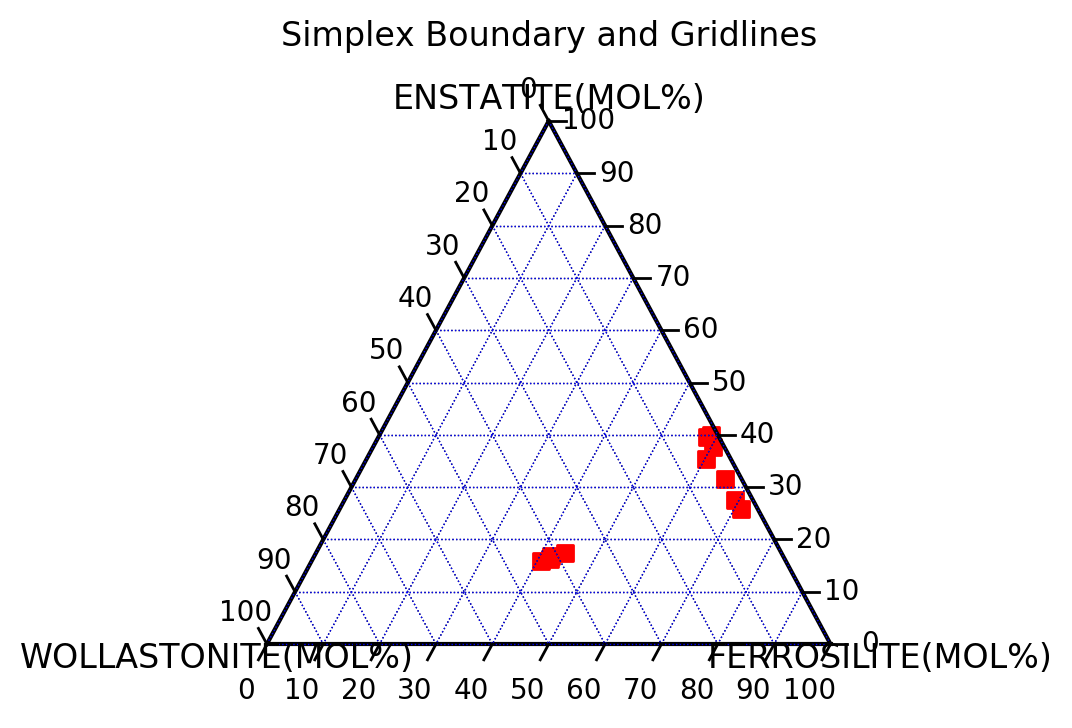

In [36]:
import csv

corners = []
points = []

with open('ternary_data.csv') as csvfile:
    reader = csv.reader(csvfile)
    corners = next(reader)
    for row in reader:
        
        points.append(list(map(lambda x: float(x), row)))
        
print(points)

## Boundary and Gridlines
scale = 100
figure, tax = ternary.figure(scale=scale)
# figure.set_size_inches(6, 6)

# Draw Boundary and Gridlines
tax.boundary(linewidth=1.5)
tax.gridlines(color="black", multiple=10)
tax.gridlines(color="blue", multiple=10, linewidth=0.5)

# Set Axis labels and Title
fontsize = 12
tax.set_title("Simplex Boundary and Gridlines\n", fontsize=fontsize)
tax.left_corner_label(corners[2], fontsize=fontsize, offset=0.14)
tax.right_corner_label(corners[1], fontsize=fontsize, offset=0.14)
tax.top_corner_label(corners[0], fontsize=fontsize, offset=0.14)

# Set ticks
tax.ticks(axis='lbr', linewidth=1, multiple=10, offset=0.03)

# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

tax.scatter(points, marker='s', color='red', label="Red Squares")

ternary.plt.show()